# 수집한 데이터로 자연어 분석

In [1]:
!pip install kiwipiepy


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
pd.set_option('display.max_rows', 100)

import re
from kiwipiepy import Kiwi

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

#각자 데이터가 저장되어 있는 경로 및 파일이름으로 넣어야 함
filepath = 'C:/Users/hisem/Desktop/DataAnalysisPython/3장/data' 
dc = pd.read_excel(filepath+"/디시인사이드_편의점게시물.xlsx")
dc.head(2)

,게시물제목,내용,기타정보,날짜,작성시간,요일,시간(H)
0,편의점 손님,편의점 일하시는 분들 밤 7시에서 아침 7시 야간 12시간 일하는데 손님이 90~1...,편의점2022.06.02 19:33,2022.06.02,19:33,목요일,19
1,축구 몇시부터야? 편의점 다녀와도 될까? 15분거리임,아이스크림 먹으면서 보고싶어 감자칩이랑,기타 국내 드라마2022.06.02 19:32,2022.06.02,19:32,목요일,19


In [28]:
print('데이터 크기 확인: ', dc.shape)
dc['글'] = dc['게시물제목'] + " " + dc['내용']
dc['글'] = dc['글'].astype('str')
dc['글_한글'] = dc['글'].apply(lambda x:"".join(re.compile("[가-힣]+").findall(x)))
dc.head(2)

데이터 크기 확인:  (2496, 11)


,게시물제목,내용,기타정보,날짜,작성시간,요일,시간(H),글,글_한글,명사,label
0,편의점 손님,편의점 일하시는 분들 밤 7시에서 아침 7시 야간 12시간 일하는데 손님이 90~1...,편의점2022.06.02 19:33,2022.06.02,19:33,목요일,19,편의점 손님 편의점 일하시는 분들 밤 7시에서 아침 7시 야간 12시간 일하는데 손...,편의점손님편의점일하시는분들밤시에서아침시야간시간일하는데손님이명정도면많은편인가요,"[편의점, 손님, 편의점, 아침, 시야, 시간, 손님, 정도]",
1,축구 몇시부터야? 편의점 다녀와도 될까? 15분거리임,아이스크림 먹으면서 보고싶어 감자칩이랑,기타 국내 드라마2022.06.02 19:32,2022.06.02,19:32,목요일,19,축구 몇시부터야? 편의점 다녀와도 될까? 15분거리임 아이스크림 먹으면서 보고싶어 ...,축구몇시부터야편의점다녀와도될까분거리임아이스크림먹으면서보고싶어감자칩이랑,"[축구, 편의점, 거리, 아이스크림, 감자]",


In [18]:
kiwi = Kiwi()

text = '나는 학교에 간다'
kiwi.tokenize(text)

[Token(form='나', tag='NP', start=0, len=1),
 Token(form='는', tag='JX', start=1, len=1),
 Token(form='학교', tag='NNG', start=3, len=2),
 Token(form='에', tag='JKB', start=5, len=1),
 Token(form='가', tag='VV', start=7, len=1),
 Token(form='ᆫ다', tag='EF', start=7, len=2)]

In [5]:
text = '나는 학교에 간다'
result = kiwi.tokenize(text)

nouns = []
for token in result:
    if token.tag == 'NNG':
        nouns.append(token.form)

print("입력한 문장에서 명사 추출 결과:", nouns)

입력한 문장에서 명사 추출 결과: ['학교']


In [19]:
def find_nouns(text):
    """입력된 문장에서 명사 추출해 리스트로 반환"""
    tokens = kiwi.tokenize(text)

    target_words = []
    for wrd in tokens:
        if 'NN' in wrd.tag:
            if len(wrd.form) > 1:
                target_words.append(wrd.form)
    return target_words

dc['명사'] = dc['글_한글'].apply(lambda x: find_nouns(x))
dc.sample(3)

,게시물제목,내용,기타정보,날짜,작성시간,요일,시간(H),글,글_한글,명사
754,요즘도 노노 재팬 하니?,왜 아사히를 안 파니 편의점에서,마작2022.06.01 07:32,2022.06.01,07:32,수요일,7,요즘도 노노 재팬 하니? 왜 아사히를 안 파니 편의점에서,요즘도노노재팬하니왜아사히를안파니편의점에서,"[요즘, 노노, 아사히, 편의점]"
2404,원신카드 이벤트 질문,편의점 쿠폰은 카드 신청한 애들 다 주는겨? - dc official App,원신 project2022.05.29 23:04,2022.05.29,23:04,일요일,23,원신카드 이벤트 질문 편의점 쿠폰은 카드 신청한 애들 다 주는겨? - dc offi...,원신카드이벤트질문편의점쿠폰은카드신청한애들다주는겨,"[원시, 카드, 이벤트, 질문, 편의점, 쿠폰, 카드, 신청]"
1040,나는 풀 뜯어 먹은적 한번있음. 쓰러질뻔 해서.,근데 맛없어서 편의점에서 빵사먹음. - dc official App,헬스2022.05.31 19:22,2022.05.31,19:22,화요일,19,나는 풀 뜯어 먹은적 한번있음. 쓰러질뻔 해서. 근데 맛없어서 편의점에서 빵사먹음....,나는풀뜯어먹은적한번있음쓰러질뻔해서근데맛없어서편의점에서빵사먹음,[편의점]


## 데이터 분석 1: 많이 등장한 단어를 찾아주는 다빈도 단어 분석

In [20]:
from collections import Counter

noun_lists = dc['명사'].tolist()

noun_list = sum(noun_lists, [])

noun_sent = " ".join(noun_list)

noun_tokens = noun_sent.split()

common_words = Counter(noun_tokens).most_common()

keys = []
counts = []

for i in range(len(common_words)):
    key = common_words[i][0]

    count = common_words[i][1]

    keys.append(key)
    counts.append(count)
dc_count = pd.DataFrame({'단어':keys, '빈도':counts})
dc_count.describe()

,빈도
count,4636.000000
mean,4.307161
std,41.895783
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,2739.000000


In [21]:
dc_count[dc_count['빈도']>3][:100]

,단어,빈도
0,편의점,2739
1,알바,489
2,시간,215
3,사람,212
4,생각,185
5,야간,182
6,담배,147
7,새끼,103
8,카드,101
9,정도,95


## 데이터 분석 2 : 자주 등장하는 짝궁 단어를 찾아 주는 nGram 분석

In [22]:
def getGram(tokens, n):
    """분절된 단어를 전달하면 nGram을 반환"""
    bigrams = []
    for i in range(0, int(len(tokens))):
        tmp = tokens[i:i+n]
        if len(tmp) > 1:
            bigrams.append(tmp)

    ngram_result = pd.DataFrame(data={'nGram':bigrams})
    ngram_result['nGram'] = ngram_result['nGram'].apply(lambda x:" ".join(x))
    ngram_result = ngram_result['nGram'].value_counts().to_frame()
    ngram_result.reset_index(inplace=True)

    return ngram_result

bigram = getGram(noun_list, n=2)
bigram[bigram['count']>1][:100]

,nGram,count
0,편의점 알바,288
1,편의점 편의점,124
2,편의점 야간,85
3,사람 편의점,64
4,알바 편의점,46
5,편의점 매출,45
6,편의점 도시락,43
7,근무 편의점,42
8,시간 편의점,41
9,시간 근무,40


In [23]:
necessary_pds = ['맥주', '도시락', '음료수', '김밥', '샌드위치', '라면', '치킨', '커피']

def label_product(product):

    """제품 기반으로 문서 분류"""
    labels = []
    for word in necessary_pds:
        if word in product:
            labels.append(word)
    label = "-".join(labels)
    return label

dc['label'] = dc['글'].apply(lambda x:label_product(x))
dc['label'].value_counts()[1:15]

label
라면         80
맥주         51
커피         45
도시락        45
김밥         32
음료수        29
치킨         22
샌드위치       17
김밥-라면       7
맥주-치킨       3
김밥-커피       2
도시락-라면      2
라면-치킨       2
김밥-샌드위치     2
Name: count, dtype: int64

Text(0.5, 0, '빈도')

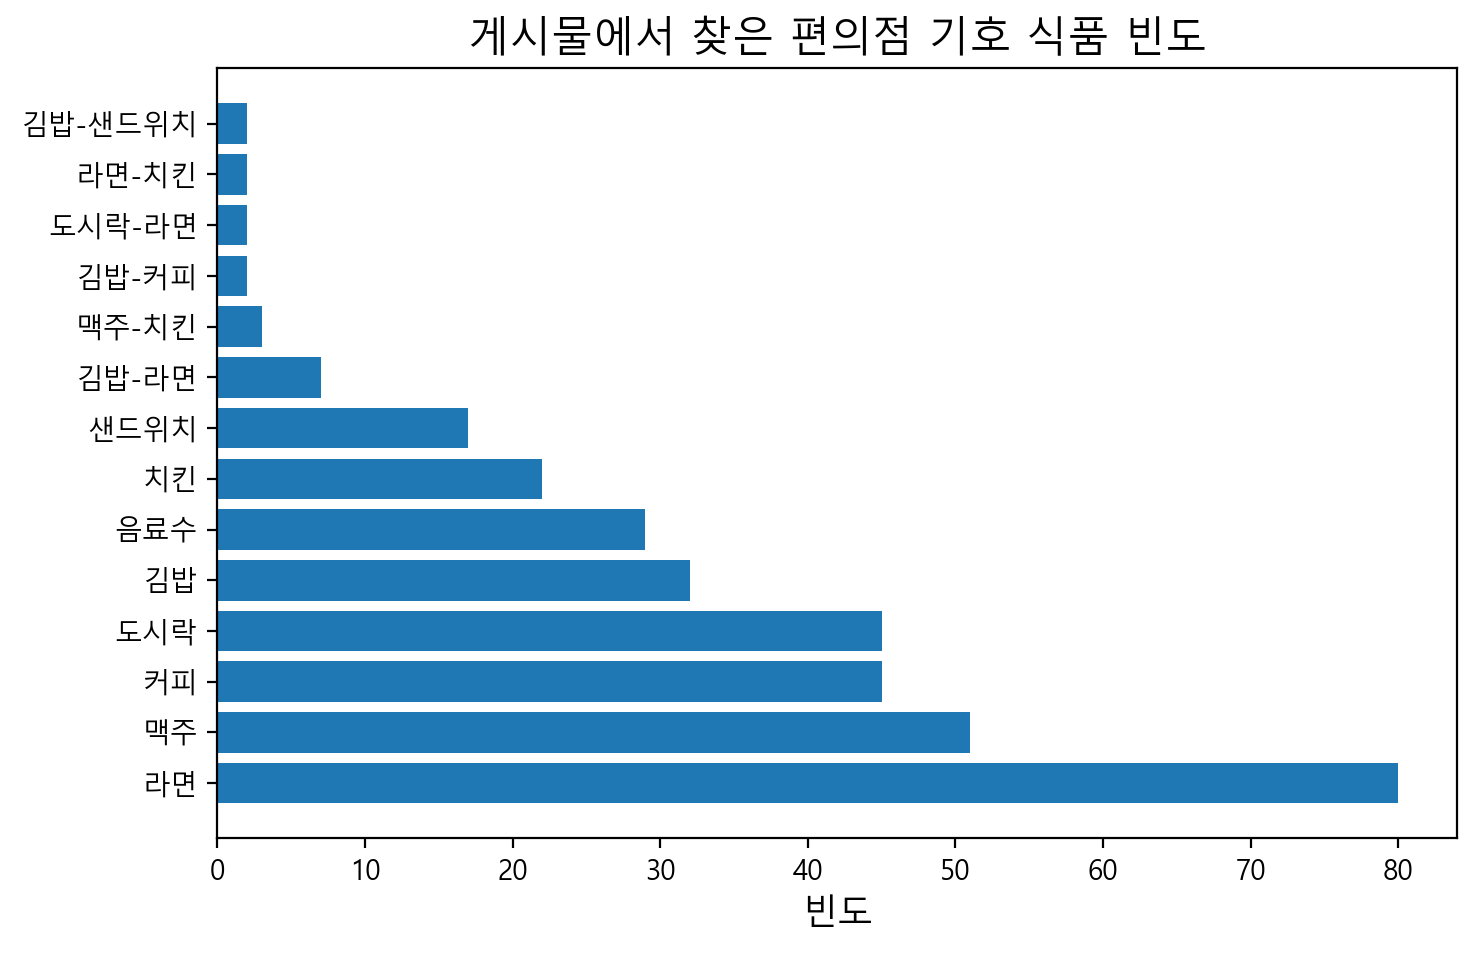

In [24]:
x = dc['label'].value_counts()[1:15].index
y = dc['label'].value_counts()[1:15].values

plt.figure(figsize=(8, 5))
plt.title('게시물에서 찾은 편의점 기호 식품 빈도', size=15)
plt.barh(x, y)
plt.xlabel('빈도', size=13)

## 데이터 분석 4 : TFIDF로 편의점 주요 키워드 찾기

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
    '편의점에서 가장 맛있는 건 치킨 입니다. 역시 치킨',
    '편의점 도시락 요새 맛있어요',
    '커피 편의점에서도 파는 군요.' 
]

tfidf_vect = TfidfVectorizer()

tfidf_vect.fit(docs)

tfidf_array = tfidf_vect.transform(docs).toarray()
tfidf_voca = tfidf_vect.vocabulary_

df_exam = pd.DataFrame(data=tfidf_array, columns=tfidf_voca, index=['문서1', '문서2', '문서3'])
df_exam.T

,문서1,문서2,문서3
편의점에서,0.333333,0.0,0.0
가장,0.000000,0.0,0.5
맛있는,0.000000,0.5,0.0
치킨,0.333333,0.0,0.0
입니다,0.000000,0.5,0.0
역시,0.333333,0.0,0.0
편의점,0.000000,0.5,0.0
도시락,0.333333,0.0,0.0
요새,0.666667,0.0,0.0
맛있어요,0.000000,0.0,0.5


In [ ]:
dosirak = " ".join(dc[dc['label']=='도시락']['글_한글'].tolist())
noodle = " ".join(dc[dc['label']=='라면']['글_한글'].tolist())
kimbob = " ".join(dc[dc['label']=='김밥']['글_한글'].tolist())
coffee = " ".join(dc[dc['label']=='커피']['글_한글'].tolist())

docs = [dosirak, noodle, kimbob, coffee]

tfidf = TfidfVectorizer().fit(docs)
tfidf_array = tfidf.transform(docs).toarray()
tfidf_voca = tfidf.vocabulary_

df_tfidf = pd.DataFrame(tfidf_array, columns=tfidf_voca, index=['도시락', '라면', '김밥', '커피'])
df_tfidf_t = df_tfidf.T

df_tfidf_t.sort_values(by='도시락', ascending=False)[:]

,도시락,라면,김밥,커피
컵내유년시절을책임져준라면임주머니속원이면한겨울에도든든했지친구랑편의점노상테이블에서한컵씩하고서학원에갔던아련한추억,0.291730,0.0,0.0,0.0
냉동도시락먹고있는데약탄걸최근에제때복용안해서인지잘모르겠는데피부가안좋아졌어아최근에운동도안했다편의점도시락은피부에안좋은건이미알고있는데이런냉동도시락도안좋은걸까아님그냥내가약을,0.145865,0.0,0.0,0.0
요새보면편의점도시락이훨씬싸다통신사할인까지받으면같은퀄대비천원은더싼듯,0.145865,0.0,0.0,0.0
대가문제있긴해하루에담배갑씩태우고식사는편의점도시락으로때울것이지전문점가서씩쓰며사진찍어서인스타에허세질한거올리고적금은제대로하지도못하고여친이랑클럽가서좆질해보겠다고돈,0.145865,0.0,0.0,0.0
형님들불철주야고생하십니다다름이아니라야식이땡겨서편의점에가야하는어디편의점추천하시는지요도시락은잘안먹습니다,0.145865,0.0,0.0,0.0
하자괴감드네억누구는편의점도시락쳐먹는데애미시발,0.145865,0.0,0.0,0.0
님들편의점도시락폐기뜨면하나가져가도됨점장이폐기얘긴딱히없엇는데,0.145865,0.0,0.0,0.0
집청소해야하는데귀찮아편의점도시락박스의산이생겼어부끄럽고한심하다,0.145865,0.0,0.0,0.0
편의점도시락도태국이베트남보다훨씬맛있네진짜도시락도배트남레알맛대가리없어,0.145865,0.0,0.0,0.0
오늘뭔날이냐대진보대학생처럼생긴아재는라면사서굳이안에서안쳐먹고밖에서쳐먹고편의점문앞에다짱개그릇두듯이컵라면국물채로버리고가고위와같이진보대학생같아보이는커플부부는안에서,0.145865,0.0,0.0,0.0
